In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
#读取没有表头的数据
data = pd.read_csv('boston.csv')

In [29]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


+ CRIM：城市人均犯罪率。
+ ZN：占地面积超过25,000平方英尺的住宅用地比例。
+ INDUS：城市非零售商业用地比例。
+ CHAS：查尔斯河虚拟变量（如果是河流，则为1；否则为0）。
+ NOX：一氧化氮浓度（每千万份）。
+ RM：每个住宅的平均房间数。
+ AGE：1940年以前建造的自住房屋的比例。
+ DIS：到波士顿五个就业中心的加权距离。
+ RAD：径向公路的可达性指数。
+ TAX：每一万美元的全额物业税率。
+ PTRATIO：城市的学生-教师比例。
+ B：1000(Bk - 0.63)^2，其中Bk是城市中黑人的比例。
+ LSTAT：较低地位人口的百分比。
+ MEDV：自住房的中位数价值（单位：千美元）。

## 采用线性回归法进行预测

In [30]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #标准化数据

In [32]:
#分割数据集
X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,:-1],data.iloc[:,-1],test_size=0.3,random_state=0)

In [33]:
# 处理缺失值

#标准化数据
ss_X = StandardScaler()
ss_y = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)
# y_train = ss_y.fit_transform(y_train.values.reshape(-1,1))
# y_test = ss_y.transform(y_test.values.reshape(-1,1))

In [34]:
#使用线性回归模型
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred = lr.predict(X_test)

In [36]:
#  获取线性回归的权重和偏置
weights = lr.coef_
bias = lr.intercept_
print('权重：',weights)
print('偏置：',bias)

权重： [-1.01190059  1.05028027  0.07920966  0.618962   -1.87369102  2.70526979
 -0.27957264 -3.09766486  2.09689998 -1.88606339 -2.26110466  0.58264309
 -3.44049838]
偏置： 22.7454802259887


In [37]:
score = lr.score(X_test,y_test)
print('模型得分：',score)

模型得分： 0.6733825506400195


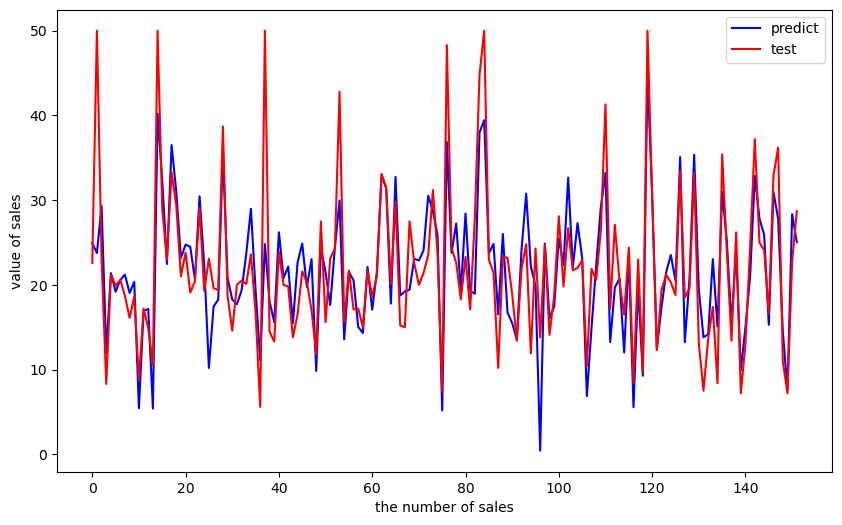

In [38]:
# 绘制放假预测值与真实值的折线图对比
plt.figure(figsize=(10,6))

# x轴代表样本编号，y轴代表房价
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

## 采用岭回归

In [39]:
from sklearn.linear_model import Ridge

#使用岭回归模型

#设置不同的alpha值
ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
ridge_y_pred = ridge.predict(X_test)
print('岭回归模型得分：',ridge.score(X_test,y_test))

岭回归模型得分： 0.6727737684528233


In [42]:
precesion_list_of_ridge = []
for alpha in np.linspace(0,1,20):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    ridge_y_pred = ridge.predict(X_test)
    precesion_list_of_ridge.append(ridge.score(X_test,y_test))


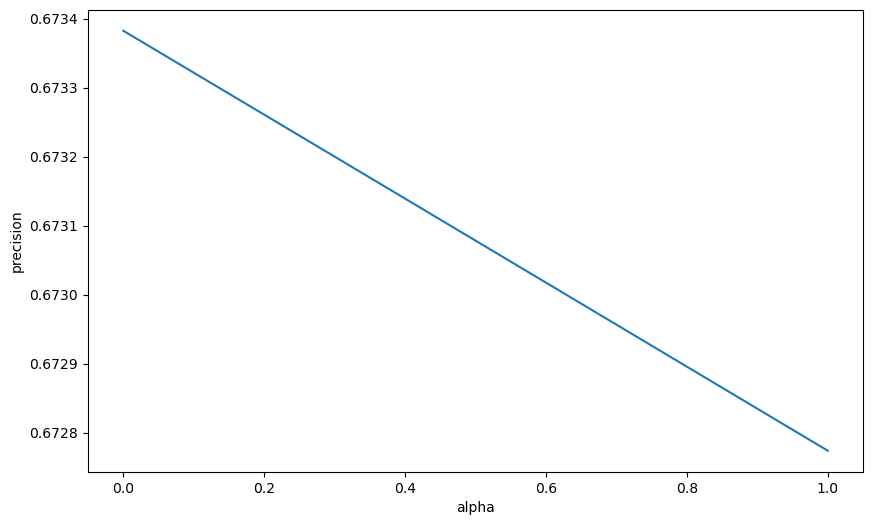

In [43]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0,1,20),precesion_list_of_ridge)
plt.xlabel('alpha')
plt.ylabel('precision')
plt.show()

In [44]:
print('采用岭回归最大正确率：',max(precesion_list_of_ridge))

采用岭回归最大正确率： 0.6733825506400196


## 采用套索回归

In [40]:
from sklearn.linear_model import Lasso

#使用Lasso模型
lasso = Lasso(alpha=1.0)
lasso.fit(X_train,y_train)
lasso_y_pred = lasso.predict(X_test)
print('Lasso模型得分：',lasso.score(X_test,y_test))

Lasso模型得分： 0.5999442961470397


In [45]:
precesion_list_of_lasso = []

for alpha in np.linspace(0,1,20):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    lasso_y_pred = lasso.predict(X_test)
    precesion_list_of_lasso.append(lasso.score(X_test,y_test)) 

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.533e+03, tolerance: 3.001e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = c

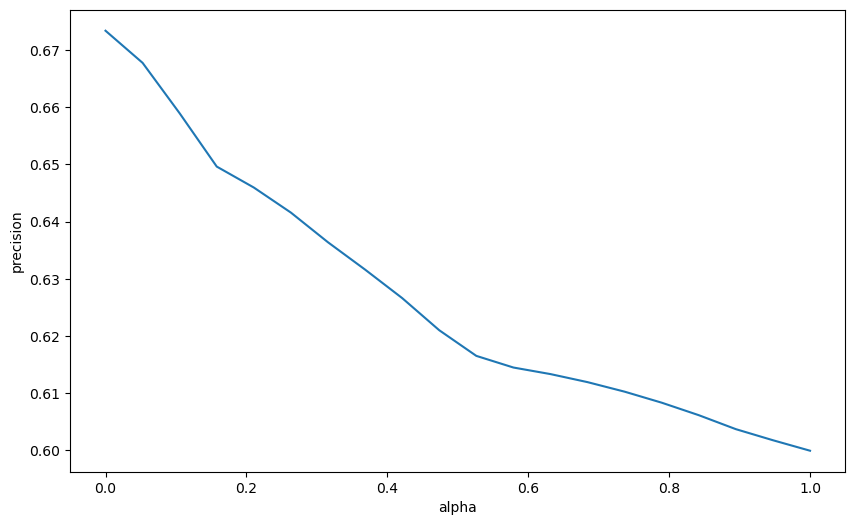

In [46]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0,1,20),precesion_list_of_lasso)
plt.xlabel('alpha')
plt.ylabel('precision')
plt.show()

In [47]:
# 采用Lasso模型最大正确率
print('采用Lasso模型最大正确率：',max(precesion_list_of_lasso))

采用Lasso模型最大正确率： 0.6733825506400197
